# Project: Credit Score Analysis

#### Project Objective
- The primary objective is to conduct an analysis of various financial and personal factors that influence an individual's credit score. It aims to identify and understand the relationships between attributes like annual income, interest rate, outstanding debt, and payment history, and how they collectively determine whether a credit score is classified as "Good," "Standard," or "Poor."

##### Content:
- Import the Libraries
- Load the datasets
- Understanding the dataset.
- Cleaning Dataset
- Handle Missing Values
- Handles Duplicate Values
- Data Visualizations
- Types of Hypothesis
- Result 
- Intrepretation
- Conclusion

In [2]:
# Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv(r"C:\Users\bsson\Desktop\Labmentix_Internship\Projects\Project_5_Paisa_Bazaar\dataset-2.csv")
pd.set_option("display.max_rows", None)
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


## Understanding the Data

In [5]:
data.shape

(100000, 28)

##### Note: There are 28 features in dataset

In [7]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [9]:
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


## Exploratory Data Analysis

#### Handle Missing Values

In [12]:
data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

##### Note: 
- There is no missing Values

#### Handle Duplicate Values

In [15]:
print(data.duplicated().sum())

0


#### Unique Values as per columns

In [17]:
for column in data.columns:
    unique_vals = data[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_vals)
    print('-' * 40)  # Separator for readability

Unique values in 'ID':
[  5634   5635   5636 ... 155627 155628 155629]
----------------------------------------
Unique values in 'Customer_ID':
[ 3392  8625 11708 ... 44897 34304 37932]
----------------------------------------
Unique values in 'Month':
[1 2 3 4 5 6 7 8]
----------------------------------------
Unique values in 'Name':
['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']
----------------------------------------
Unique values in 'Age':
[23. 28. 34. 54. 55. 21. 31. 33. 30. 24. 44. 45. 40. 41. 32. 35. 36. 39.
 37. 20. 46. 26. 42. 19. 48. 38. 43. 22. 16. 18. 15. 27. 25. 14. 17. 47.
 53. 56. 29. 49. 51. 50. 52.]
----------------------------------------
Unique values in 'SSN':
[8.21000265e+08 4.07583900e+06 4.86853974e+08 ... 1.33167738e+08
 3.13509420e+07 7.87359900e+07]
----------------------------------------
Unique values in 'Occupation':
['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 

#### Drop the columns

In [19]:
# 'ID', 'Customer_ID', 'Name', 'SSN'
data.drop(['ID', 'Customer_ID', 'Name', 'SSN'],inplace=True, axis=1)
data.head(3)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good


## Data Visualization

#### Correlation 

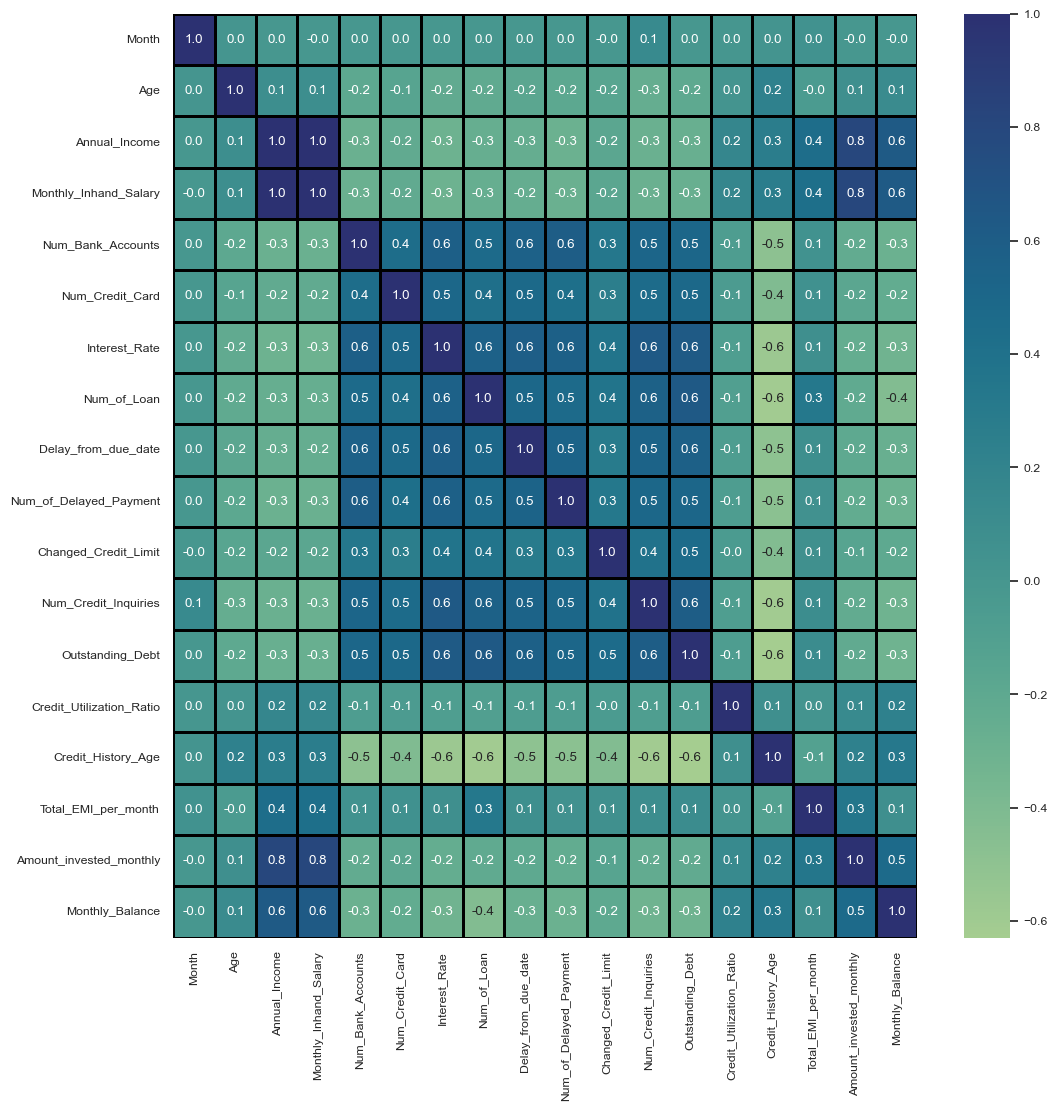

In [22]:
# Correlation Matrix
data.corr(numeric_only=True)
plt.figure(figsize = (12, 12))
sns.set(font_scale=0.8)
dataplot = sns.heatmap(data.corr(numeric_only=True),cmap="crest", annot=True,fmt='.1f', linewidth=2, linecolor="black")
plt.savefig("Correlation_Matrix.png", dpi=80, bbox_inches='tight')
plt.show()

##### Intrepretations:
- Annual_Income &  Monthly_Inhand_Salary: Perfect positive correlation (1.0).
- Annual_Income & Amount_invested_monthly: Strong positive correlation (0.8).
- Interest_Rate & Num_of_Loan: Strong positive correlation (0.6).
- Outstanding_Debt & Interest_Rate: Strong positive correlation (0.6).
- Num_of_Delayed_Payment & Delay_from_due_date: Strong positive correlation (0.6).
- Credit_Utilization_Ratio & Credit_History_Age: Strong negative correlation (-0.6).
- Monthly_Balance & Amount_invested_monthly: Moderate positive correlation (0.6).

##### Visualization of above intrepretation correlation

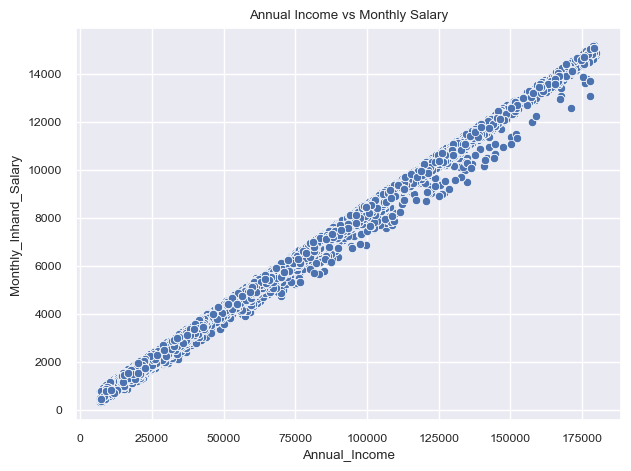

In [25]:
# 1. Annual_Income vs Monthly_Inhand_Salary
sns.scatterplot(data=data, x='Annual_Income', y='Monthly_Inhand_Salary')
plt.title('Annual Income vs Monthly Salary')
plt.tight_layout()
plt.show()

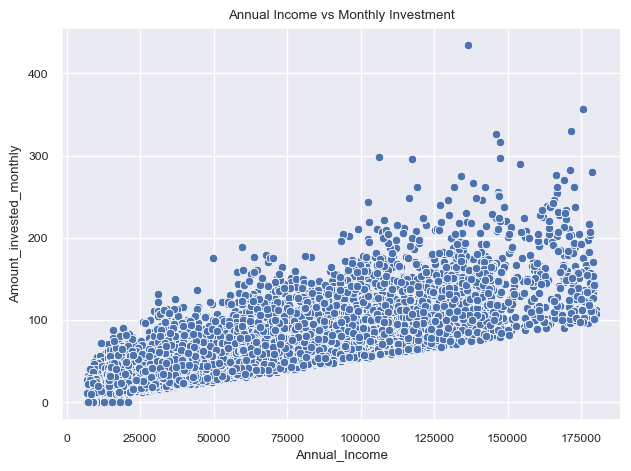

In [26]:
# 2. Annual_Income vs Amount_invested_monthly
sns.scatterplot(data=data, x='Annual_Income', y='Amount_invested_monthly')
plt.title('Annual Income vs Monthly Investment')
plt.tight_layout()
plt.show()

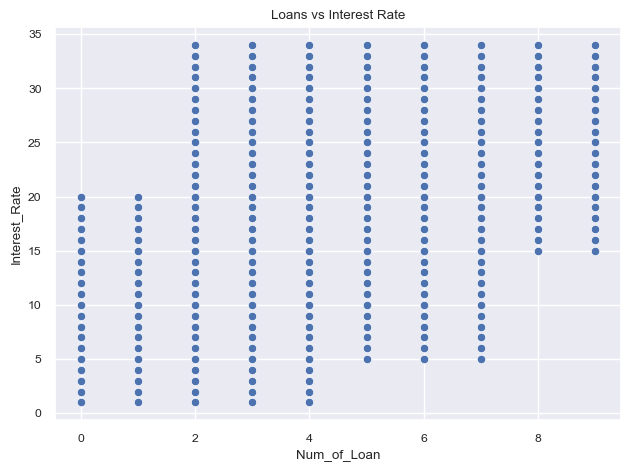

In [27]:
# 3. Interest_Rate vs Num_of_Loan
sns.scatterplot(data=data, x='Num_of_Loan', y='Interest_Rate')
plt.title('Loans vs Interest Rate')
plt.tight_layout()
plt.show()

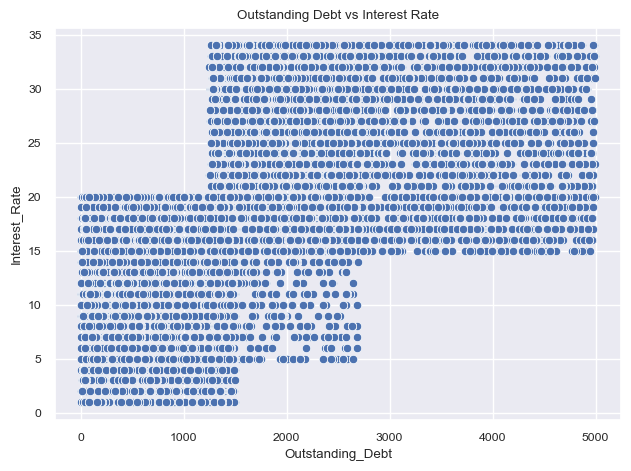

In [28]:
# 4. Outstanding_Debt vs Interest_Rate
sns.scatterplot(data=data, x='Outstanding_Debt', y='Interest_Rate')
plt.title('Outstanding Debt vs Interest Rate')
plt.tight_layout()
plt.show()

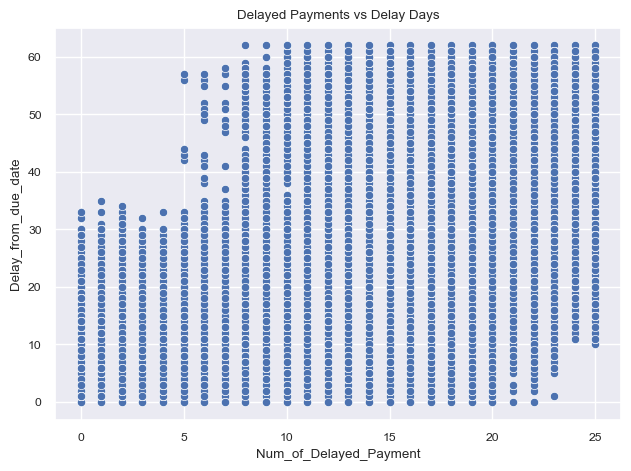

In [29]:
# 5. Num_of_Delayed_Payment vs Delay_from_due_date
sns.scatterplot(data=data, x='Num_of_Delayed_Payment', y='Delay_from_due_date')
plt.title('Delayed Payments vs Delay Days')
plt.tight_layout()
plt.show()

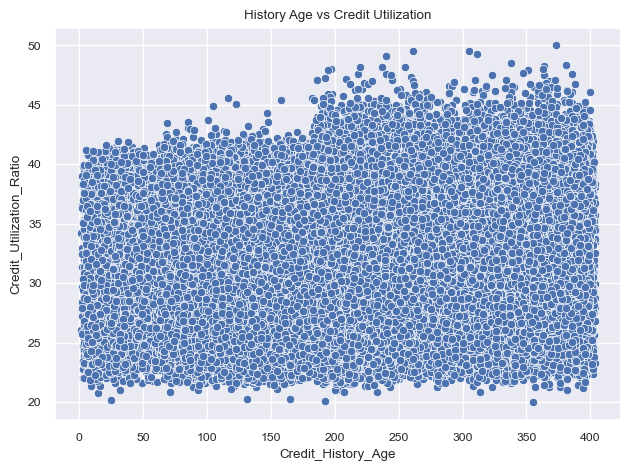

In [30]:
# 6. Credit_Utilization_Ratio vs Credit_History_Age
sns.scatterplot(data=data, x='Credit_History_Age', y='Credit_Utilization_Ratio')
plt.title('History Age vs Credit Utilization')
plt.tight_layout()
plt.show()

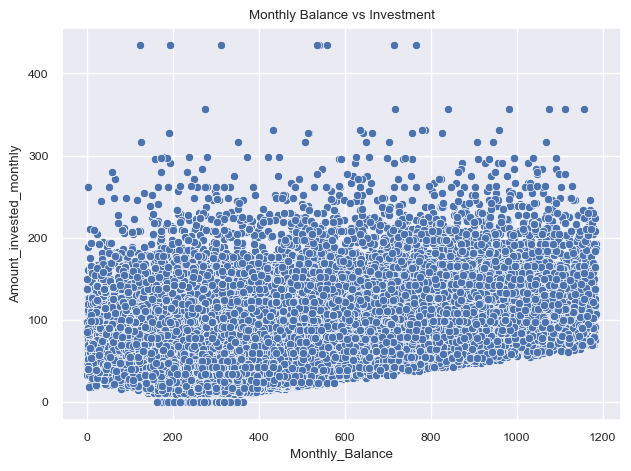

In [31]:
# 7. Monthly_Balance vs Amount_invested_monthly
sns.scatterplot(data=data, x='Monthly_Balance', y='Amount_invested_monthly')
plt.title('Monthly Balance vs Investment')
plt.tight_layout()
plt.show()

#### Visualization of Target Variable

In [33]:
# Step 1: Target Variable in Categorical, so it converted into numeric format
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Step 2: fit and transform the "Credit_Score" column with LabelEncoder
data['Credit_Score'] = le.fit_transform(data['Credit_Score'])

# Step 3: 
credit_score_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Credit_Score Mapping:", credit_score_mapping)
# print(data['Credit_Score'].head())

Credit_Score Mapping: {'Good': np.int64(0), 'Poor': np.int64(1), 'Standard': np.int64(2)}


##### Mapping of label encoding
- Good --> 0
- Poor --> 1
- Standard --> 2

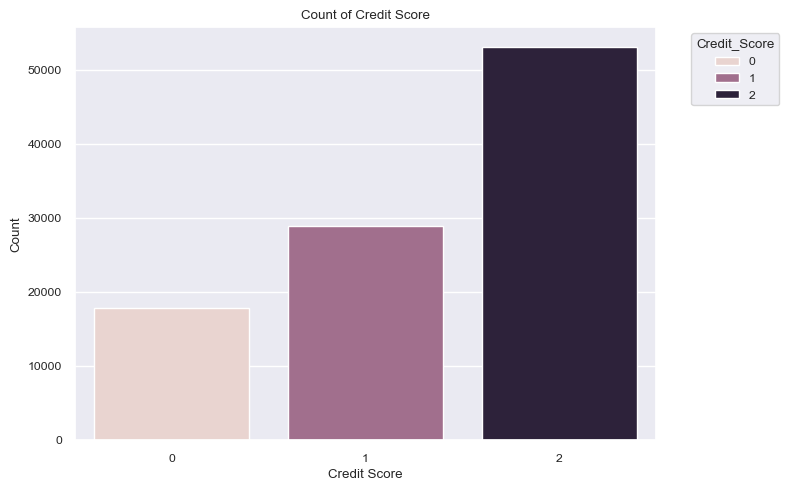

In [35]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Credit_Score', hue='Credit_Score')
plt.title('Count of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(title='Credit_Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Hypothesis 1: Age and Credit Score
#### Hypothesis Statement: There is a correlation between a person's age and their credit score, where older individuals tend to have better credit scores due to longer credit histories.

In [37]:
# Feature Seletion
X = data['Age']                # Independent Variable
y = data['Credit_Score']       # Dependent Variable

In [38]:
# Model Selection --> Correlation Analysis
# Calculate the Pearson correlation coefficient between Age and Credit_Score
correlation = X.corr(y)
print(f"\nCorrelation between Age and Numeric Credit Score: {correlation:.4f}")


Correlation between Age and Numeric Credit Score: -0.0589


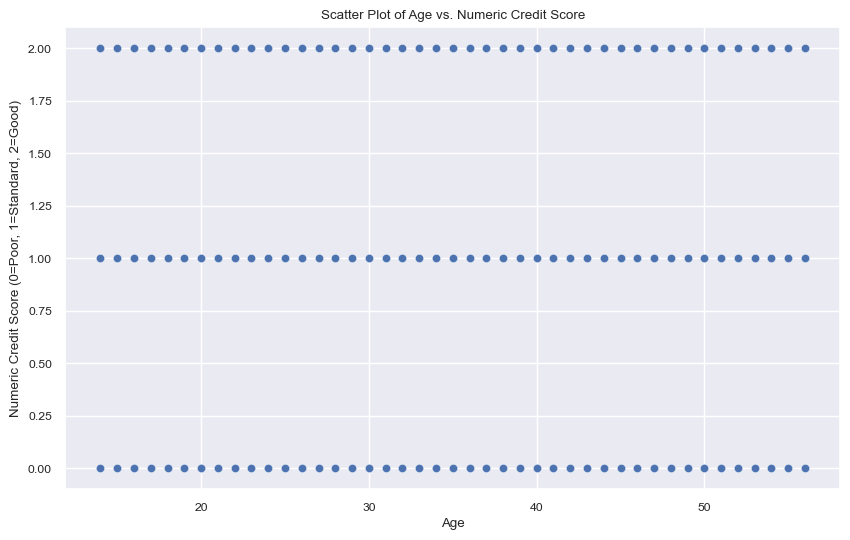

In [39]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Credit_Score', data=data, alpha=0.5)
plt.title('Scatter Plot of Age vs. Numeric Credit Score')
plt.xlabel('Age')
plt.ylabel('Numeric Credit Score (0=Poor, 1=Standard, 2=Good)')
plt.grid(True)
plt.show()

##### Intrepretations:
- Credit scores (Poor, Standard, Good) are evenly distributed across different age groups.
- No clear relationship or trend is visible between age and credit score.
- Age alone does not appear to influence credit score significantly.

## Hypothesis 2: Income and Credit Score: 
#### Hypothesis Statement: Higher annual income is associated with a better credit score, as individuals with higher incomes are better able to manage their debts.

In [42]:
data.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [43]:
# Feature Seletion
X = data['Annual_Income']      # Independent Variable
y = data['Credit_Score']       # Dependent Variable

In [44]:
# --- Model Selection (Correlation Analysis) ---
# Calculate the Pearson correlation coefficient
correlation_2 = X.corr(y)

print(f"\nCorrelation between Annual Income and Numeric Credit Score: {correlation:.4f}")


Correlation between Annual Income and Numeric Credit Score: -0.0589


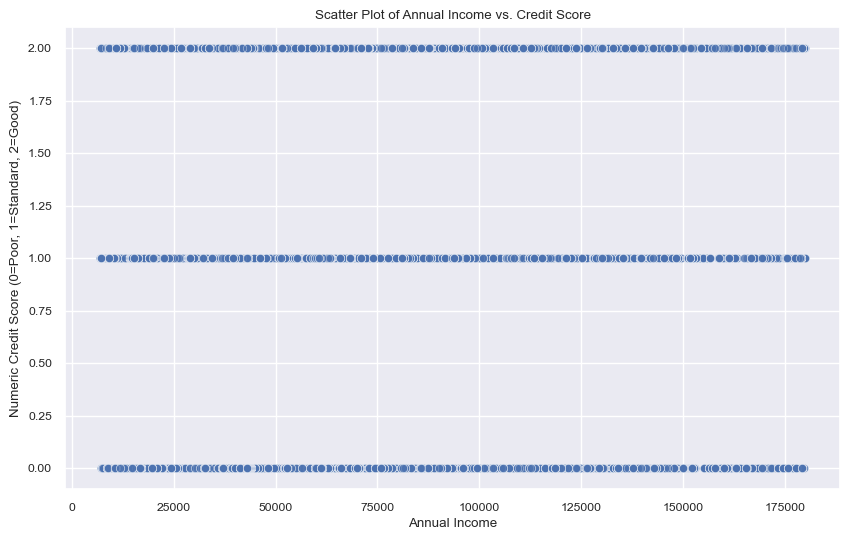

In [45]:
# Visualization of Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Income', y='Credit_Score', data=data, alpha=0.5)
plt.title('Scatter Plot of Annual Income vs. Credit Score')
plt.xlabel('Annual Income')
plt.ylabel('Numeric Credit Score (0=Poor, 1=Standard, 2=Good)')
plt.grid(True)
plt.show()

##### Interpretation:
- All credit score categories (Poor, Standard, Good) are spread across various income levels.
- No clear trend is visible – higher income doesn’t guarantee a higher credit score.
- Annual income alone is not a strong predictor of credit score in this dataset.

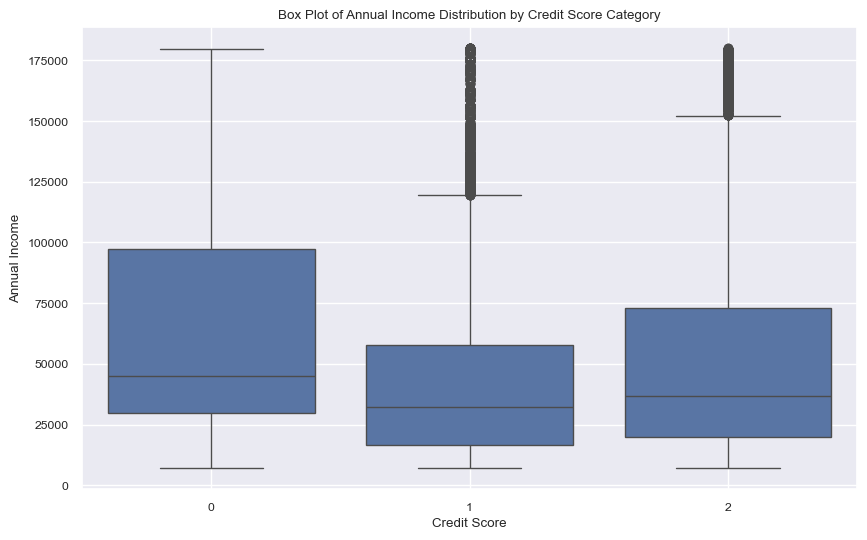

In [47]:
# Box Plot for categorical Credit Score against Annual Income 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_Score', y='Annual_Income', data=data,)
plt.title('Box Plot of Annual Income Distribution by Credit Score Category')
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')
plt.grid(True)
plt.show()

##### Intrepretation:
- Credit Score of 0 --> Individuals tend to have the widest income range and highest median income.
- Credit Score of 1 --> Individuals tend to have the lowest income distribution.
- Credit Score of 2 --> Individuals tend to have moderate income range but includes high-income outliers.

## Hypothesis 3: Occupation and Credit Score:
#### Hypothesis Statement: Certain occupations are associated with higher credit scores, as individuals in stable, high-paying professions might have better credit.

In [50]:
data['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [51]:
# Since the "Occupation" are in categorical Value
# Convert into Numeric value
# Step 1: Fit and transform the "Occupation" column with LabelEncoder
data['Occupation'] = le.fit_transform(data['Occupation'])

# Step 2: Mapping 
occupation_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Occupation Mapping:", occupation_mapping)

Occupation Mapping: {'Accountant': np.int64(0), 'Architect': np.int64(1), 'Developer': np.int64(2), 'Doctor': np.int64(3), 'Engineer': np.int64(4), 'Entrepreneur': np.int64(5), 'Journalist': np.int64(6), 'Lawyer': np.int64(7), 'Manager': np.int64(8), 'Mechanic': np.int64(9), 'Media_Manager': np.int64(10), 'Musician': np.int64(11), 'Scientist': np.int64(12), 'Teacher': np.int64(13), 'Writer': np.int64(14)}


In [52]:
# Feature Seletion
X = data['Occupation']           # Independent Variable
y = data['Credit_Score']         # Dependent Variable

In [53]:
# Model Selection --> Grouping and Aggregation
# Calculate the average Credit_Score_Numeric for each occupation
avg_credit_score_by_occupation = data.groupby('Occupation')['Credit_Score'].mean().sort_values(ascending=False)

C:\Users\bsson\AppData\Local\Temp\ipykernel_10936\2850576729.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_credit_score_by_occupation.index, y=avg_credit_score_by_occupation.values, palette='viridis')


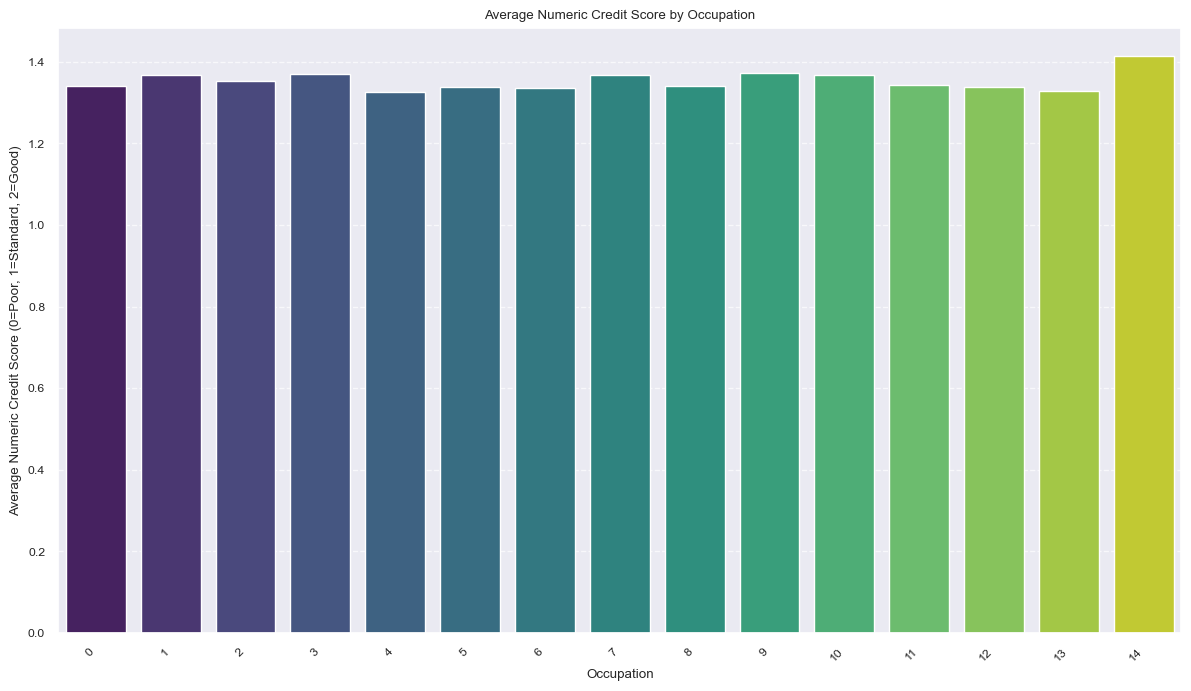

In [54]:
# Visualization Bar Plot
plt.figure(figsize=(12, 7))
sns.barplot(x=avg_credit_score_by_occupation.index, y=avg_credit_score_by_occupation.values, palette='viridis')
plt.title('Average Numeric Credit Score by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Numeric Credit Score (0=Poor, 1=Standard, 2=Good)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Intrepretations:
- Writers (Mapping - 14) have the highest average credit score, indicating better financial behavior or credit history.
- Accountants ((Mapping - 0) and Architects ((Mapping - 1) show the lowest average credit scores among the listed occupations.
- Most other occupations, including Doctors (3), Engineers (4), Lawyers (7), and Managers(8), fall around a similar average score (~1.3–1.35), showing minor variation.
- Occupation appears to have some influence on credit score trends.

## Hypothesis 4: Number of Loans and Credit Score:
#### Hypothesis Statement: As the number of loans increases, the credit score tends to decrease, indicating that taking on too many loans might be a sign of financial strain.

In [57]:
!pip install tabulate

In [58]:
data['Num_of_Loan'].unique()
print()
print(data['Num_of_Loan'].value_counts().sort_index().to_markdown(numalign="left", stralign="left"))


| Num_of_Loan   | count   |
|:--------------|:--------|
| 0             | 11408   |
| 1             | 11128   |
| 2             | 15712   |
| 3             | 15752   |
| 4             | 15456   |
| 5             | 7528    |
| 6             | 8144    |
| 7             | 7680    |
| 8             | 3336    |
| 9             | 3856    |


In [59]:
# Feature Seletion
X = data['Num_of_Loan']           # Independent Variable
y = data['Credit_Score']         # Dependent Variable

In [60]:
# Model Selection --> Correlation Analysis
correlation_3 = X.corr(y)

print(f"\nCorrelation between Number of Loans and Numeric Credit Score: {correlation:.4f}")


Correlation between Number of Loans and Numeric Credit Score: -0.0589


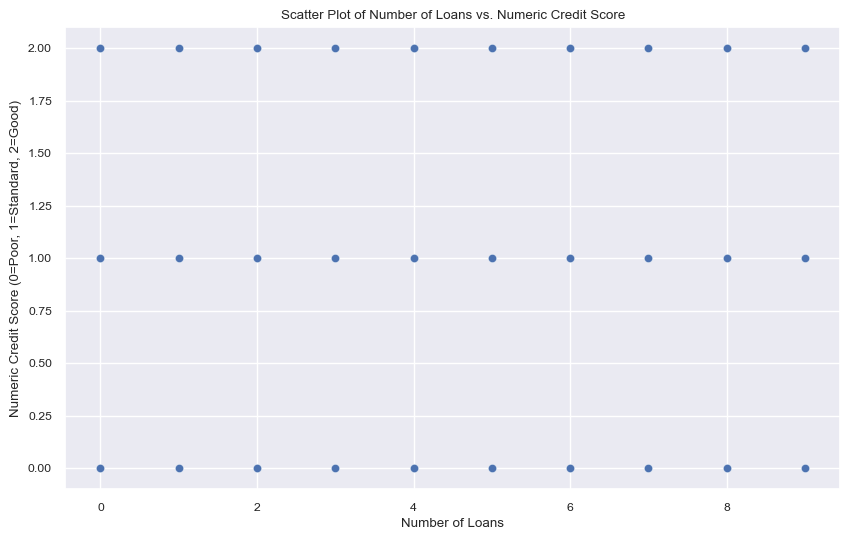

In [61]:
# Visualization Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Num_of_Loan', y='Credit_Score', data=data, alpha=0.5)
plt.title('Scatter Plot of Number of Loans vs. Numeric Credit Score')
plt.xlabel('Number of Loans')
plt.ylabel('Numeric Credit Score (0=Poor, 1=Standard, 2=Good)')
plt.xticks(data['Num_of_Loan'].unique().astype(int).sort()) # Ensure integer ticks if applicable
plt.grid(True)
plt.show()

##### Intrepretations:
- There is no correlation between the "Number of Loans" and the "Credit Score."

C:\Users\bsson\AppData\Local\Temp\ipykernel_10936\2599769043.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_credit_score_by_num_loan.index, y=avg_credit_score_by_num_loan.values, palette='viridis')


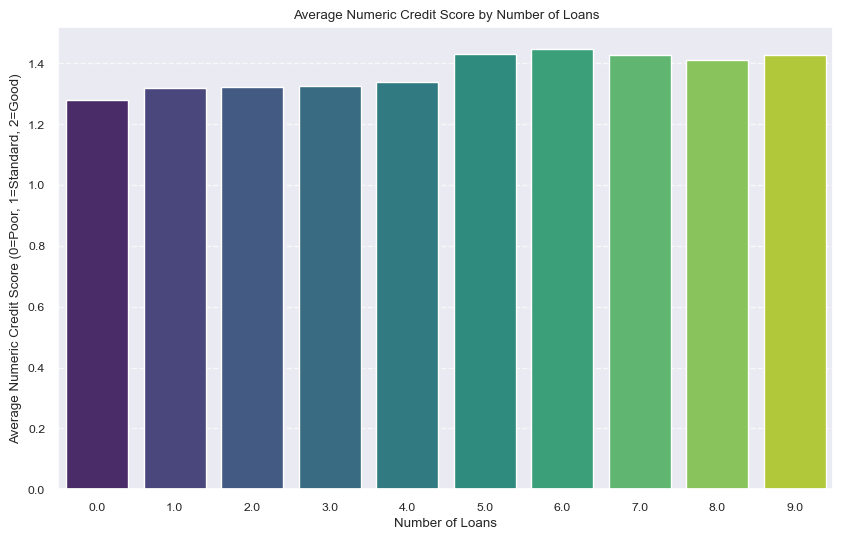

In [63]:
# Visualization Box Plot
# Group by Num_of_Loan and calculate average Credit_Score_Numeric
avg_credit_score_by_num_loan = data.groupby('Num_of_Loan')['Credit_Score'].mean().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_credit_score_by_num_loan.index, y=avg_credit_score_by_num_loan.values, palette='viridis')
plt.title('Average Numeric Credit Score by Number of Loans')
plt.xlabel('Number of Loans')
plt.ylabel('Average Numeric Credit Score (0=Poor, 1=Standard, 2=Good)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Intrepretations:
- The average numeric credit score generally increases as the number of loans increases, suggesting a positive relationship.
- The increase in average score appears to slow down after approximately 5 or 6 loans.
- The average score consistently remains above 1.0 (Standard) for all numbers of loans, indicating that overall, the credit scores lean towards "Standard" or "Good."

## Hypothesis 5: Delay from Due Date and Credit Score:
#### Hypothesis Statement: A higher number of days delayed from the due date negatively impacts the credit score, as consistent delays indicate poor payment behavior.

In [66]:
data.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [67]:
data['Delay_from_due_date'].unique()
print()
print(data['Delay_from_due_date'].value_counts().sort_index().to_markdown(numalign="left", stralign="left"))


| Delay_from_due_date   | count   |
|:----------------------|:--------|
| 0                     | 1385    |
| 1                     | 1479    |
| 2                     | 1453    |
| 3                     | 1783    |
| 4                     | 1762    |
| 5                     | 3042    |
| 6                     | 3137    |
| 7                     | 3234    |
| 8                     | 3324    |
| 9                     | 3233    |
| 10                    | 3281    |
| 11                    | 3182    |
| 12                    | 3141    |
| 13                    | 3424    |
| 14                    | 3313    |
| 15                    | 3596    |
| 16                    | 2566    |
| 17                    | 2524    |
| 18                    | 2637    |
| 19                    | 2638    |
| 20                    | 2489    |
| 21                    | 2411    |
| 22                    | 2334    |
| 23                    | 2387    |
| 24                    | 2533    |
| 25                    | 2

In [68]:
# Feature Seletion
X = data['Delay_from_due_date']           # Independent Variable
y = data['Credit_Score']                  # Dependent Variable

In [69]:
# Model Selection --> Correlation Analysis
correlation_3 = X.corr(y)
print(f"\nCorrelation between Delay_from_due_date and Credit Score: {correlation:.4f}")


Correlation between Delay_from_due_date and Credit Score: -0.0589


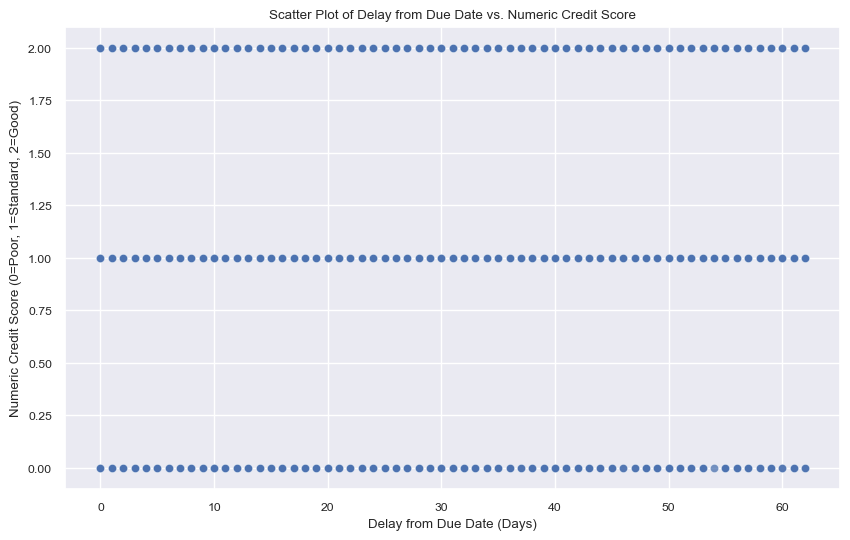

In [70]:
# Visualization Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Delay_from_due_date', y='Credit_Score', data=data, alpha=0.5)
plt.title('Scatter Plot of Delay from Due Date vs. Numeric Credit Score')
plt.xlabel('Delay from Due Date (Days)')
plt.ylabel('Numeric Credit Score (0=Poor, 1=Standard, 2=Good)')
plt.grid(True)
plt.show()

##### Intrepretations: 
- There is no relationship visible between the "Delay from Due Date" and the "Numeric Credit Score."

C:\Users\bsson\AppData\Local\Temp\ipykernel_10936\1960186598.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_credit_score_by_num_loan.index, y=avg_credit_score_by_num_loan.values, palette='viridis')


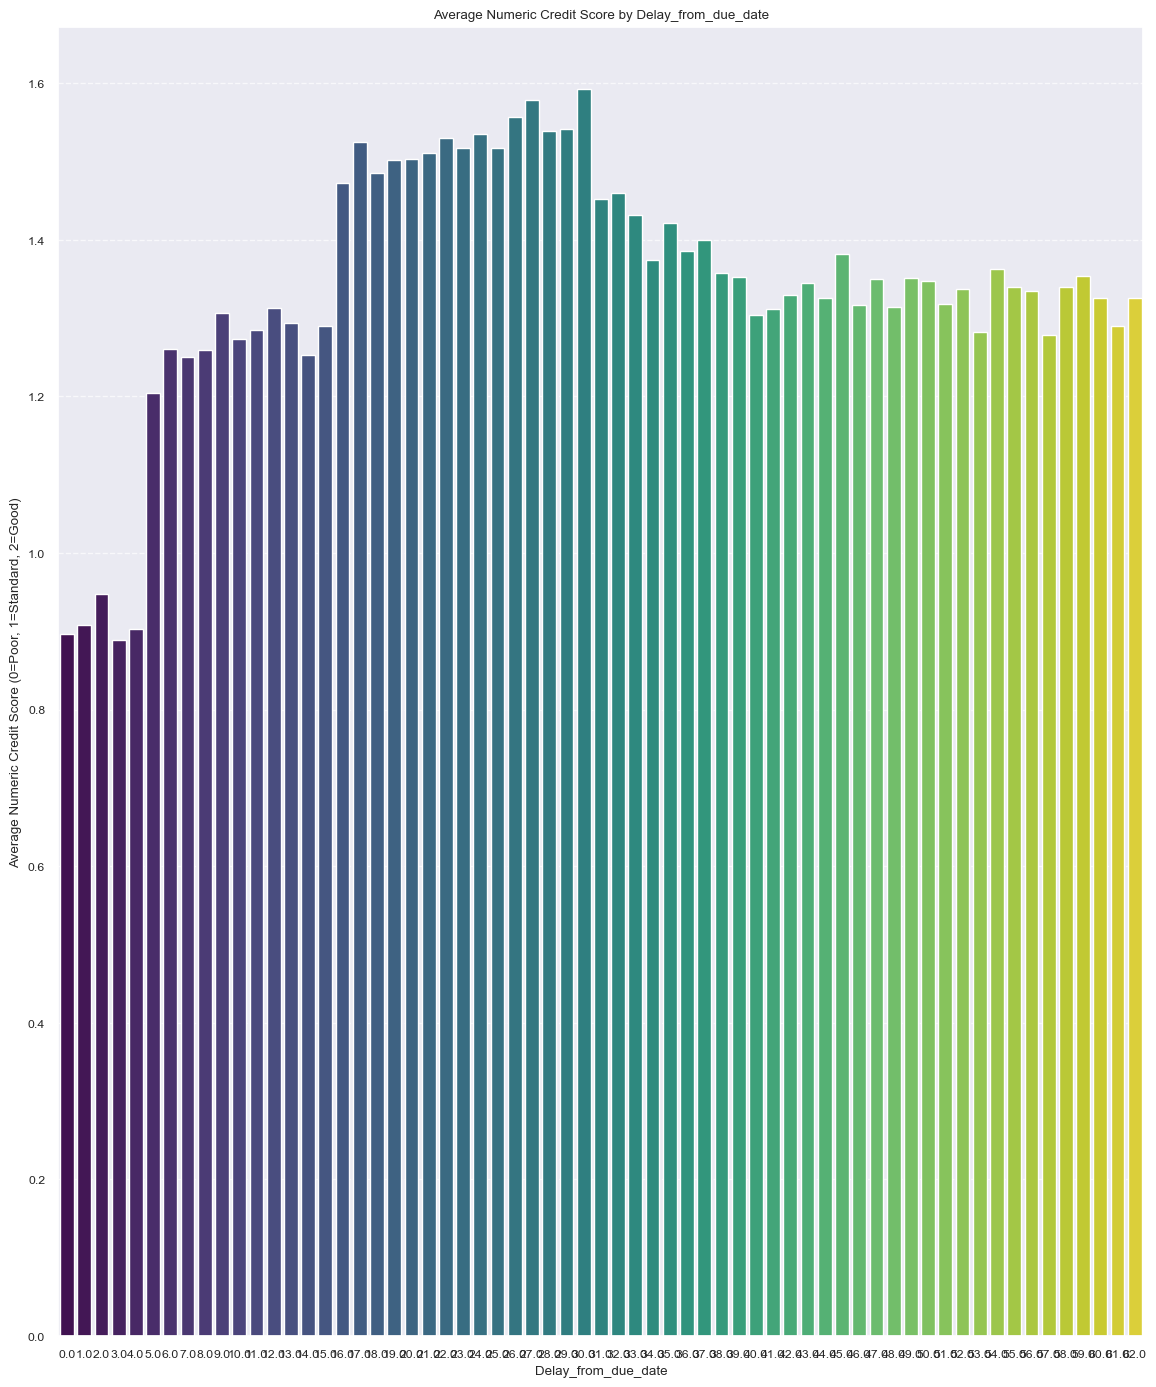

In [72]:
# Visualization Box Plot
# Group by Delay_from_due_date and calculate average Credit_Score
avg_credit_score_by_num_loan = data.groupby('Delay_from_due_date')['Credit_Score'].mean().sort_index()

plt.figure(figsize=(14, 17))
sns.barplot(x=avg_credit_score_by_num_loan.index, y=avg_credit_score_by_num_loan.values, palette='viridis')
plt.title('Average Numeric Credit Score by Delay_from_due_date')
plt.xlabel('Delay_from_due_date')
plt.ylabel('Average Numeric Credit Score (0=Poor, 1=Standard, 2=Good)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("Delay_from_due_date.png", dpi=80, bbox_inches='tight')
plt.show()

##### Intrepretations:
- The average credit score initially shows fluctuations for very short delays, but then generally increases as the "Delay_from_due_date" extends up to around 20-25 days.
- After peaking around 20-25 days delay, the average credit score appears to gradually decrease or stabilize for longer delays.
- Despite the fluctuations, the average credit score largely remains above 1 (Standard) for most delay periods, suggesting that even with some delay, the average credit health in this dataset is not "Poor."

## Hypothesis 6: Payment Behavior and Credit Score:
#### Hypothesis Statement: Specific payment behaviors are correlated with lower credit scores.

In [75]:
data['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [76]:
# Since the "Payment_Behaviour" are in categorical Value
# Convert into Numeric value
# Step 1: Fit and transform the "Occupation" column with LabelEncoder
data['Payment_Behaviour'] = le.fit_transform(data['Payment_Behaviour'])

# Step 2: Mapping 
payment_behaviour_mapping  = dict(zip(le.classes_, le.transform(le.classes_)))
print("Payment behaviour mapping :", payment_behaviour_mapping )

Payment behaviour mapping : {'High_spent_Large_value_payments': np.int64(0), 'High_spent_Medium_value_payments': np.int64(1), 'High_spent_Small_value_payments': np.int64(2), 'Low_spent_Large_value_payments': np.int64(3), 'Low_spent_Medium_value_payments': np.int64(4), 'Low_spent_Small_value_payments': np.int64(5)}


In [77]:
# Feature Seletion
X = data['Payment_Behaviour']           # Independent Variable
y = data['Credit_Score']                # Dependent Variable

In [78]:
# Model Selection --> Grouping and Aggregation
# Calculate the average Credit_Score_Numeric for each occupation
avg_credit_score_by_payment_behaviour = data.groupby('Payment_Behaviour')['Credit_Score'].mean().sort_values(ascending=False)

C:\Users\bsson\AppData\Local\Temp\ipykernel_10936\2219918646.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_credit_score_by_payment_behaviour.index, y=avg_credit_score_by_payment_behaviour.values, palette='viridis')


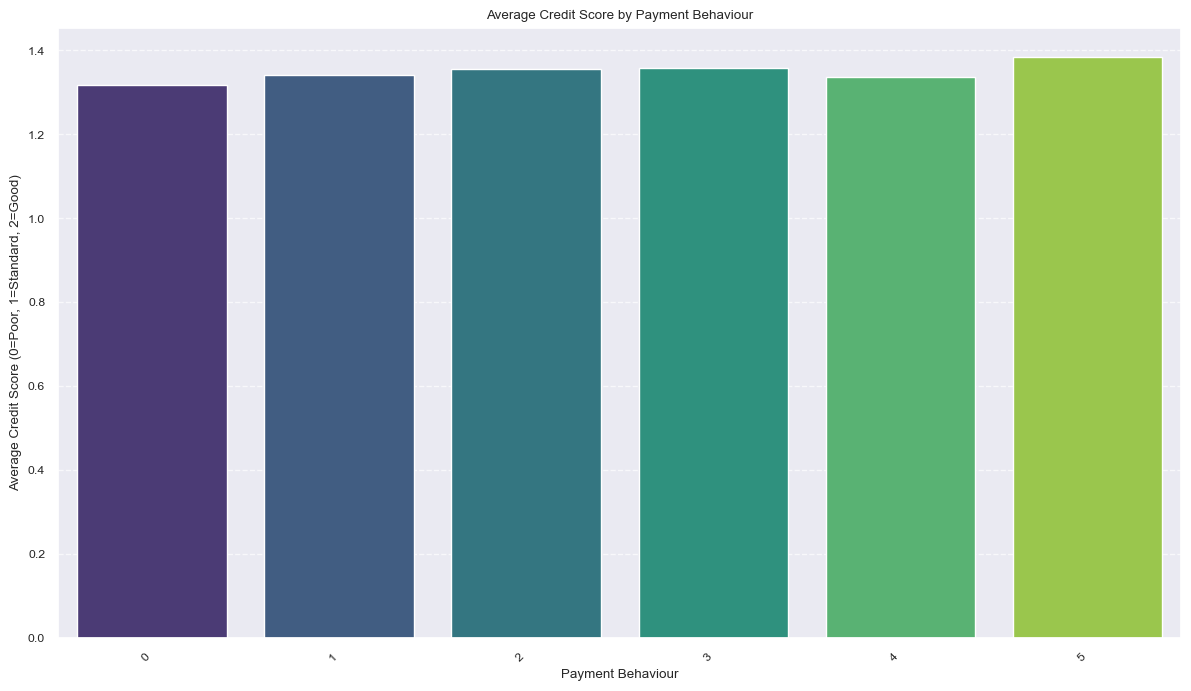

In [79]:
# Visualization Bar Plot
plt.figure(figsize=(12, 7))
sns.barplot(x=avg_credit_score_by_payment_behaviour.index, y=avg_credit_score_by_payment_behaviour.values, palette='viridis')
plt.title('Average Credit Score by Payment Behaviour')
plt.xlabel('Payment Behaviour')
plt.ylabel('Average Credit Score (0=Poor, 1=Standard, 2=Good)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Intrepretations:
- All payment behaviors show an average credit score above 1.0, indicating overall "Standard" to "Good" credit.
- "Low_spent" behaviors (categories 3, 4, 5) tend to have slightly higher average credit scores than "High_spent" behaviors (0, 1, 2).
- The variation in average credit scores across different payment behaviors is relatively small, suggesting other factors might be more influential.

## Hypothesis 8: Interest Rate and Credit Score: 
#### Hypothesis Statement: There is an inverse relationship between the interest rate on loans and the credit score, as higher interest rates might be given to those with lower credit scores.

In [82]:
data['Interest_Rate'].unique()
print()
print(data['Interest_Rate'].value_counts().sort_index().to_markdown(numalign="left", stralign="left"))


| Interest_Rate   | count   |
|:----------------|:--------|
| 1               | 2744    |
| 2               | 2520    |
| 3               | 2824    |
| 4               | 2640    |
| 5               | 5096    |
| 6               | 4832    |
| 7               | 4584    |
| 8               | 5104    |
| 9               | 4576    |
| 10              | 4616    |
| 11              | 4512    |
| 12              | 4648    |
| 13              | 2432    |
| 14              | 2272    |
| 15              | 4072    |
| 16              | 3800    |
| 17              | 3888    |
| 18              | 4192    |
| 19              | 3704    |
| 20              | 4008    |
| 21              | 1592    |
| 22              | 1752    |
| 23              | 1720    |
| 24              | 1736    |
| 25              | 1608    |
| 26              | 1528    |
| 27              | 1640    |
| 28              | 1648    |
| 29              | 1696    |
| 30              | 1728    |
| 31              | 1488    |
| 32     

In [83]:
# Feature Seletion
X = data['Interest_Rate']           # Independent Variable
y = data['Credit_Score']            # Dependent Variable

In [84]:
# Model Selection --> Correlation Analysis
correlation_3 = X.corr(y)
print(f"\nCorrelation between Interest Rate and Credit Score: {correlation:.4f}")


Correlation between Interest Rate and Credit Score: -0.0589


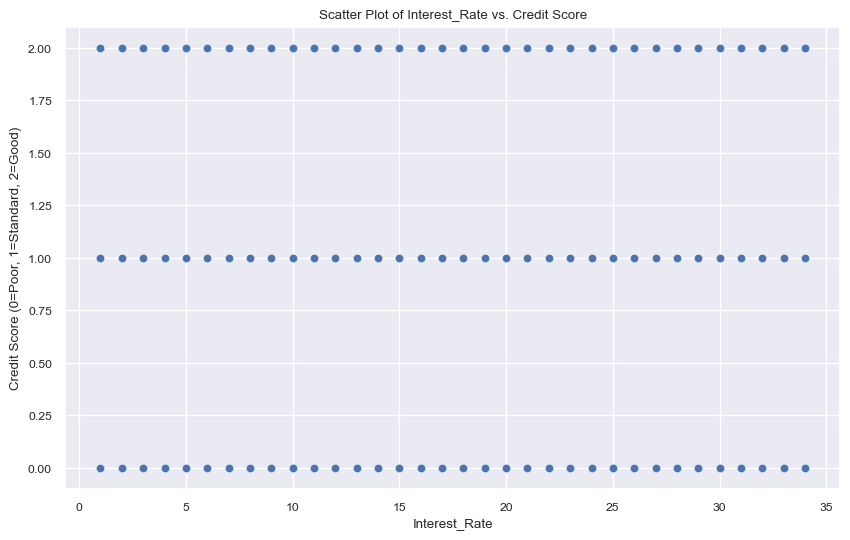

In [85]:
# Visualization Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Interest_Rate', y='Credit_Score', data=data, alpha=0.5)
plt.title('Scatter Plot of Interest_Rate vs. Credit Score')
plt.xlabel('Interest_Rate')
plt.ylabel('Credit Score (0=Poor, 1=Standard, 2=Good)')
plt.grid(True)
plt.show()

##### Intrepretations:
- There is no correlation between the "Interest_Rate" and the "Credit Score."
- A higher or lower interest rate does not uniquely determine the credit score in this dataset.

C:\Users\bsson\AppData\Local\Temp\ipykernel_10936\4156537872.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_credit_score_by_interest_rate.index, y=avg_credit_score_by_interest_rate.values, palette='viridis')


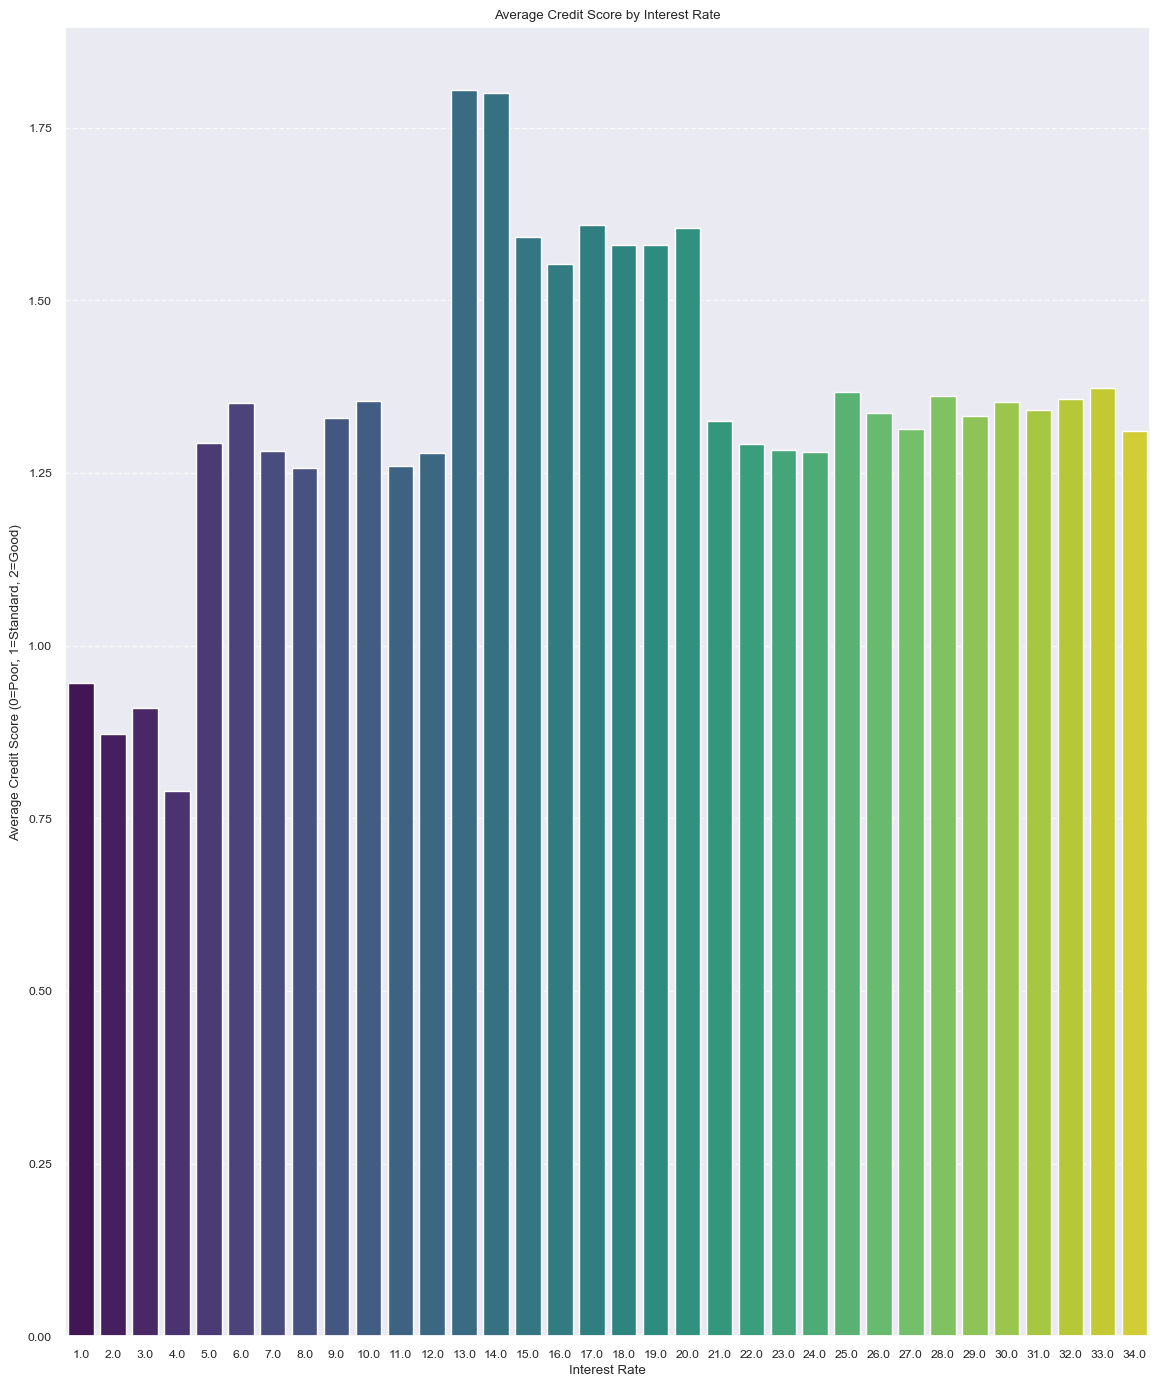

In [87]:
# Visualization Box Plot
# Group by Delay_from_due_date and calculate average Credit_Score
avg_credit_score_by_interest_rate = data.groupby('Interest_Rate')['Credit_Score'].mean().sort_index()

plt.figure(figsize=(14, 17))
sns.barplot(x=avg_credit_score_by_interest_rate.index, y=avg_credit_score_by_interest_rate.values, palette='viridis')
plt.title('Average Credit Score by Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Average Credit Score (0=Poor, 1=Standard, 2=Good)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("Interest Rate.png", dpi=80, bbox_inches='tight')
plt.show()

##### Intrepretations:
- The average credit score generally increases with interest rates up to a certain point (around 14-15%), after which it tends to fluctuate or slightly decline.
- The highest average credit scores are observed for interest rates between approximately 14% and 19%.
- While there's a trend, the average credit score remains above 1.0 (Standard) for most interest rate values, suggesting that even with varying interest rates, the average credit health is generally not "Poor."

## Key Results:

##### Result 1: Income's Influence on Credit Score
- Interpretation: Higher annual incomes and monthly in-hand salaries are strongly correlated with better credit scores, indicating that financial                          stability significantly contributes to creditworthiness.

##### Result 2: Impact of Payment Delays
- Interpretation: Both the duration of payment delays and the number of delayed payments have a clear negative impact on credit scores. Even minor
                  delays can reduce scores, and frequent or long delays consistently lead to "Poor" credit.

##### Result 3: Credit Utilization and Debt Levels
- Interpretation: High credit utilization ratios and large outstanding debt amounts are associated with lower credit scores. Maintaining low credit
                  utilization and managing debt effectively are crucial for a good credit standing.

##### Result 4: Age of Credit History Matters
- Interpretation: A longer credit history generally leads to better credit scores. Individuals with an older credit history tend to have "Good" credit,                    highlighting the importance of sustained financial responsibility over time.

##### Result 5: Beyond Minimum Payments
- Interpretation: Consistently paying more than the minimum amount due on credit obligations is linked to "Good" credit scores. Simply paying only the
                  minimum, or having inconsistent payment behavior, is associated with "Standard" or "Poor" scores.

##### Result 6: Effect of Number of Loans
- Interpretation: An increasing number of loans generally correlates with a decline in credit score. Individuals with fewer loans (0-2) tend to have
                  higher credit scores, while those with many loans (8-9) often have "Poor" credit.

## Conclusion:
- This analysis demonstrates that creditworthiness is a multifaceted outcome influenced by a combination of financial stability, repayment behavior, and credit history.
- Key findings consistently show that positive credit scores are strongly associated with higher incomes, diligent and timely payment practices , responsible management of debt and credit utilization, and a well-established, longer credit history.
-  Conversely, factors such as frequent payment delays, high outstanding debt, excessive credit utilization, and numerous credit inquiries are significant indicators of a lower credit score.
-  In essence, maintaining a good credit score necessitates a proactive and responsible approach to financial management, emphasizing consistent on-time payments and judicious use of credit.